# Esercizi 01

## 01.1

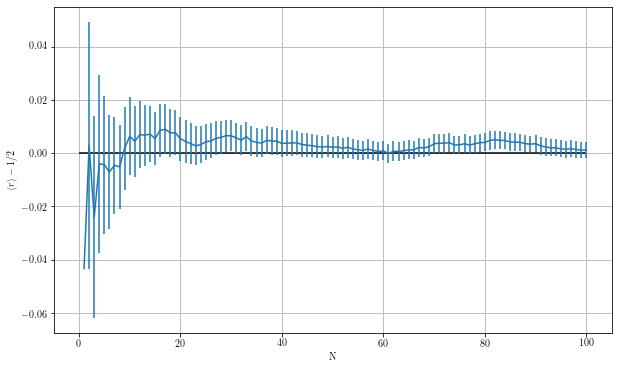

In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

n,avg,err=np.loadtxt("Ex_01_1/out_01_1a.txt", delimiter=",", skiprows=1, usecols=(0,1,2), dtype="int,float,float", unpack=True)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(10,6))
plt.hlines(0,0,100)
plt.errorbar(n,avg-0.5,yerr=err)
plt.grid()
plt.xlabel("N")
plt.ylabel(r"$\langle r \rangle-1/2$")
plt.show()

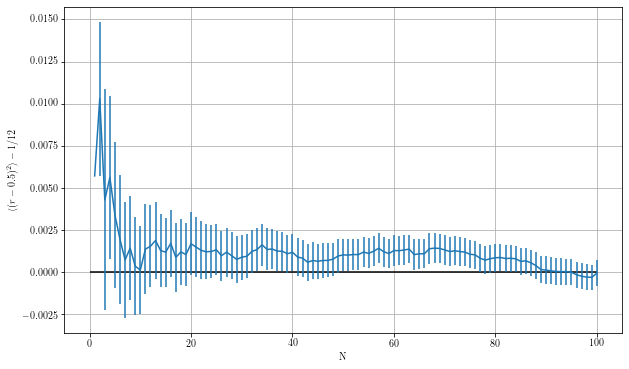

In [9]:
n,avg,err=np.loadtxt("Ex_01_1/out_01_1b.txt", delimiter=",", skiprows=1, usecols=(0,1,2), dtype="int,float,float", unpack=True)

plt.figure(figsize=(10,6))
plt.hlines(0,0,100)
plt.errorbar(n,avg-1/12,yerr=err)
plt.grid()
plt.xlabel("N")
plt.ylabel(r'$\langle (r -0.5)^2 \rangle - 1/12$')
plt.show()

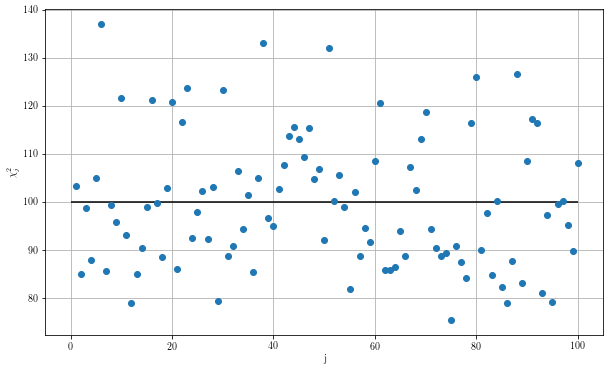

In [3]:
j,chi=np.loadtxt("Ex_01_1/out_01_1c.txt", delimiter=",", skiprows=1, usecols=(0,1), dtype="int,float", unpack=True)

plt.figure(figsize=(10,6))
plt.hlines(100,0,100)
plt.plot(j,chi,"o")
plt.grid()
plt.xlabel(r'j')
plt.ylabel(r'$\chi^2_j$')
plt.show()

I dati più lontani dal valore atteso $100$ sono intorno a $\chi \approx 140$. Considerando $d=99$ gradi di libertà si ha $P(\chi^2 > 140)<0.005$ e possiamo quindi rigettare l'ipotesi che la distribuzione **non** sia uniforme anche in quegli intervalli

## 01.2

Optimized parameters [mu,sigma] =
[3.50109644 0.16874924]
Parameters uncertainty =
[0.00064705 0.00052832]


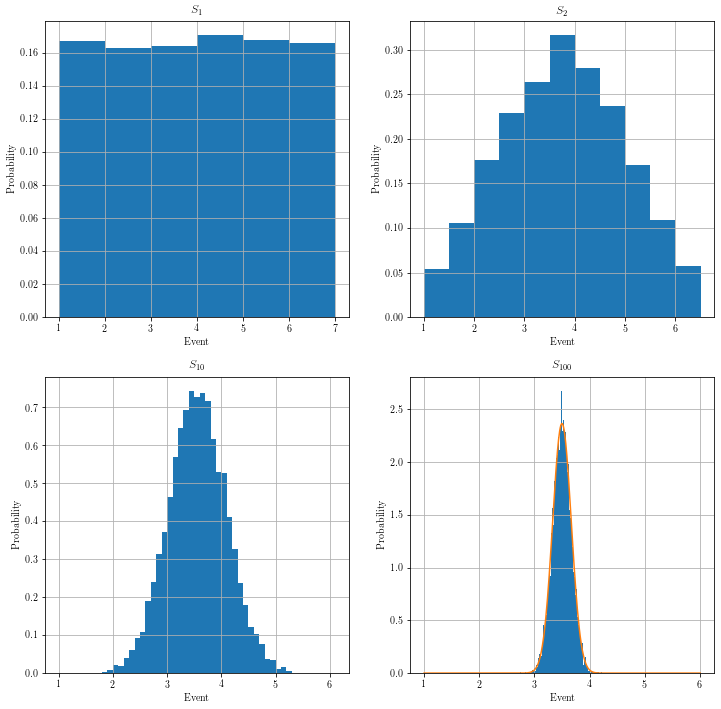

In [4]:
from scipy.optimize import curve_fit

s_1=np.loadtxt("Ex_01_2/out_std_S1.txt", skiprows=1)
s_2=np.loadtxt("Ex_01_2/out_std_S2.txt", skiprows=1)
s_10=np.loadtxt("Ex_01_2/out_std_S10.txt", skiprows=1)
s_100=np.loadtxt("Ex_01_2/out_std_S100.txt", skiprows=1)


fig, ax = plt.subplots(2, 2, figsize=(12,12))
ax[0,0].hist(s_1, 6, range=(1,7),density=True)
ax[0,0].set_title(r"$S_1$")
ax[0,1].hist(s_2, 11, range=(1,6.5),density=True)
ax[0,1].set_title(r"$S_2$")
ax[1,0].hist(s_10, 51, range=(1,6.1),density=True)
ax[1,0].set_title(r"$S_{10}$")
n,bins,patches=ax[1,1].hist(s_100, 500, range=(1,6.01),density=True)
ax[1,1].set_title(r"$S_{100}$")

for i in range(2):
    for j in range(2):
        ax[i,j].set_xlabel("Event")
        ax[i,j].set_ylabel("Probability")
        ax[i,j].grid(True)
    
def gauss(x,mu,sigma):
    return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))

#Per fare il fit considero il punto centrale dei canali
#L'array bins contiene anche l'edge a destra dell'ultimo canale
bins_width=bins[1]-bins[0]
bins_centred=[bins[i]+0.5*bins_width for i in range(len(bins)-1)]

p_opt, p_cov = curve_fit(gauss, bins_centred, n, bounds=([0,0],[6,6]))
ax[1,1].plot(bins_centred,gauss(bins_centred,p_opt[0],p_opt[1]))

print("Optimized parameters [mu,sigma] =")
print(p_opt)
print("Parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))
    
plt.show()

Optimized parameters [mu,sigma] =
[0.99201909 0.09944999]
Parameters uncertainty =
[0.00097159 0.00079334]


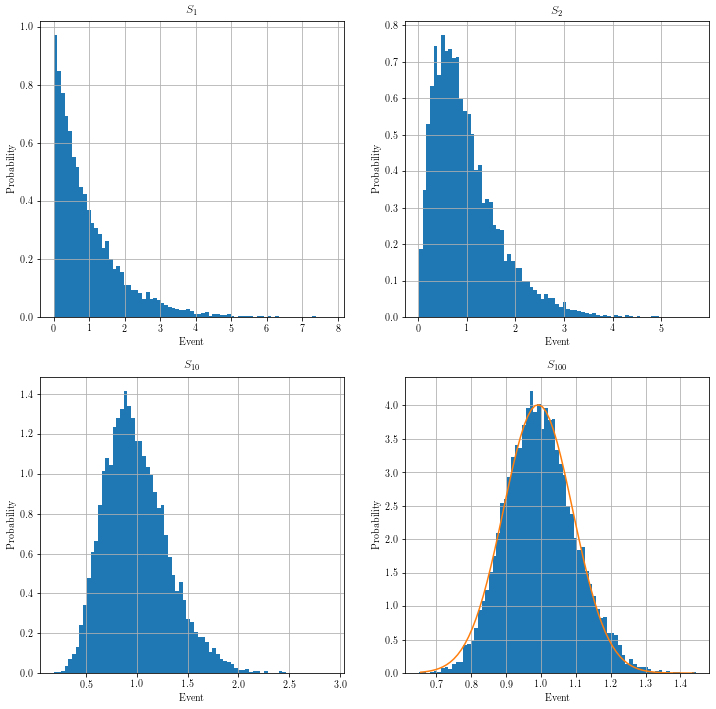

In [5]:
s_1=np.loadtxt("Ex_01_2/out_exp_S1.txt", skiprows=1)
s_2=np.loadtxt("Ex_01_2/out_exp_S2.txt", skiprows=1)
s_10=np.loadtxt("Ex_01_2/out_exp_S10.txt", skiprows=1)
s_100=np.loadtxt("Ex_01_2/out_exp_S100.txt", skiprows=1)



fig, ax = plt.subplots(2, 2, figsize=(12,12))
ax[0,0].hist(s_1, 75,density=True)
ax[0,0].set_title(r"$S_1$")
ax[0,1].hist(s_2, 75,density=True)
ax[0,1].set_title(r"$S_2$")
ax[1,0].hist(s_10, 75,density=True)
ax[1,0].set_title(r"$S_{10}$")
n,bins,patches=ax[1,1].hist(s_100, 75,density=True,align="mid")
ax[1,1].set_title(r"$S_{100}$")

for i in range(2):
    for j in range(2):
        ax[i,j].set_xlabel("Event")
        ax[i,j].set_ylabel("Probability")
        ax[i,j].grid(True)
        
def gauss(x,mu,sigma):
    return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))


#Per fare il fit considero il punto centrale dei canali
#L'array bins contiene anche l'edge a destra dell'ultimo canale
bins_width=bins[1]-bins[0]
bins_centred=[bins[i]+0.5*bins_width for i in range(len(bins)-1)]

p_opt, p_cov = curve_fit(gauss, bins_centred, n, bounds=([0,0],[6,6]))
ax[1,1].plot(bins_centred,gauss(bins_centred,p_opt[0],p_opt[1]))

print("Optimized parameters [mu,sigma] =")
print(p_opt)
print("Parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))        
            
    
plt.show()

Optimized parameters [mu,gamma] =
[-0.00703855  0.97953321]
Parameters uncertainty =
[0.00560821 0.00555303]


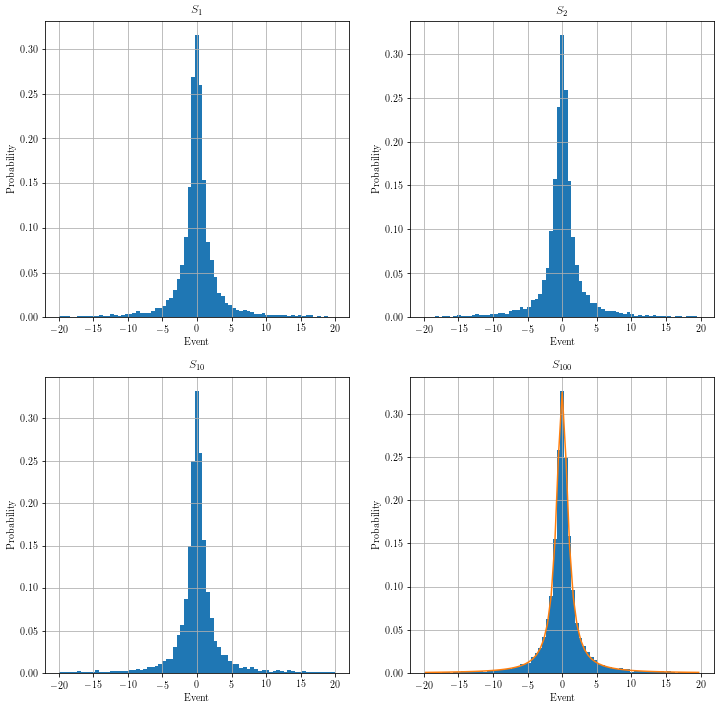

In [6]:
s_1=np.loadtxt("Ex_01_2/out_cauchy_S1.txt", skiprows=1)
s_2=np.loadtxt("Ex_01_2/out_cauchy_S2.txt", skiprows=1)
s_10=np.loadtxt("Ex_01_2/out_cauchy_S10.txt", skiprows=1)
s_100=np.loadtxt("Ex_01_2/out_cauchy_S100.txt", skiprows=1)



fig, ax = plt.subplots(2, 2, figsize=(12,12))
ax[0,0].hist(s_1, 75, range=(-20,20),density=True)
ax[0,0].set_title(r"$S_1$")
ax[0,1].hist(s_2, 75, range=(-20,20),density=True)
ax[0,1].set_title(r"$S_2$")
ax[1,0].hist(s_10, 75, range=(-20,20),density=True)
ax[1,0].set_title(r"$S_{10}$")
n,bins,patches=ax[1,1].hist(s_100, 75, range=(-20,20),density=True)
ax[1,1].set_title(r"$S_{100}$")

for i in range(2):
    for j in range(2):
        ax[i,j].set_xlabel("Event")
        ax[i,j].set_ylabel("Probability")
        ax[i,j].grid(True)
    
def cauchy(x,mu,gamma):
    return 1/np.pi*gamma/((x-mu)**2+gamma**2)

#Per fare il fit considero il punto centrale dei canali
#L'array bins contiene anche l'edge a destra dell'ultimo canale
bins_width=bins[1]-bins[0]
bins_centred=[bins[i]+0.5*bins_width for i in range(len(bins)-1)]

p_opt, p_cov = curve_fit(cauchy, bins_centred, n, bounds=([-5,0],[5,5]))
ax[1,1].plot(bins_centred,cauchy(bins_centred,p_opt[0],p_opt[1]))

print("Optimized parameters [mu,gamma] =")
print(p_opt)
print("Parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))   

plt.show()

# 01.3 - Buffon
Per descrivere il lancio di un ago bisogna individuarne un'estremità (la cruna, ad esempio), che fissa il centro di una circonferenza, e la direzione in cui esso punta.
* Per individuare il centro, ai nostri fini, è sufficiente una sola coordinata (il problema è invariante per traslazioni lungo la direzione delle righe del pavimento). Chiamo questa coordinata $c$, dovrà essere estratta uniformemente tra $0$ e $d$, la distanza tra le righe del pavimento.
* Per individuare la direzione bisognerebbe estrarre casualmente un angolo tra $-\pi$ e $\pi$ in modo uniforme, ma in questo modo useremmo $\pi$ per calcolare $\pi$. Per evitare di utilizzare $\pi$, continuando a mantenere la direzione dell'ago distribuita uniformemente, un'idea è quella di estrarre *in modo appropriato* un punto $(x,y) \in \mathbb{R}^2$ e ricavarne l'angolo delle coordinate polari. Per fare questo si può utilizzare la funzione Arcotangente2, che si può implementare senza utilizzare $\pi$, infatti: $$\theta=2\arctan{\frac{y}{\sqrt{x^2+y^2}+x}}$$ 
   1. Si potrebbero estrarre due numeri casuali $(x,y)\in \mathbb{R}^2$ gaussianamente e da questo punto ricavare l'angolo corrispondente in coordinate polari. Infatti, la distribuzione di probabilità congiunta è $p(x,y)=p(x)p(y)=\frac{1}{2\pi \sigma^4}e^{-\frac{x^2+y^2}{2\sigma^2}}$, ovvero dipende dal modulo del vettore $(x,y)$, ma non dall'angolo. In realtà per l'estrazione di numeri gaussiani si utilizza $\pi$, quindi questo metodo non mi sembra del tutto lecito.
   2. Un'alternativa più "onesta" consiste nell'estrarre le componenti del vettore (x,y) uniformemente in $[-1,1)$ e poi scartare i punti che giacciono al di fuori del cerchio unitario, che quindi risulta riempito uniformemente. Questo è il metodo seguito per fare l'esperimento. La probabilità che un punto cada all'interno del cerchio unitario è $\frac{\pi}{4}\approx0.8$, quindi rigetto circa il $20 \%$ dei punti. 
   
Una volta stabilito il modo di "lanciare" l'ago, diciamo che l'ago ha "colpito" la riga del pavimento se $c+L\cos{\theta}>d$ o $c+L\cos{\theta}<0$, ovvero se la punta dell'ago si trova prima o dopo le righe (dal momento che la cruna è stata estratta tra le righe).

<img src="buffon.png" width="400">

Ho effettuato $M=10^5$ lanci, suddivisi in $N=100$ blocchi. Ho scelto come distanza tra le righe $d=1$ e come lunghezza dell'ago $L=0.8$.

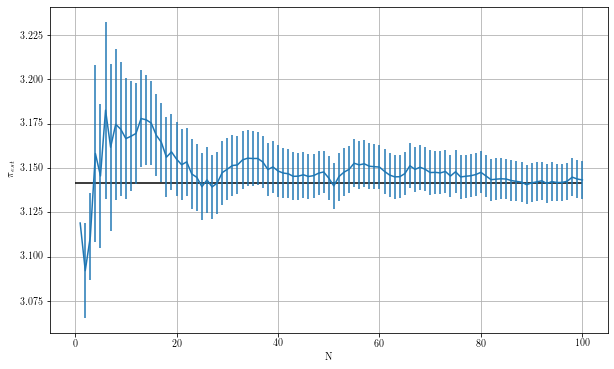

In [7]:
n,avg,err=np.loadtxt("Ex_01_3/out_01_3.txt", delimiter=",", skiprows=1, usecols=(0,1,2), dtype="int,float,float", unpack=True)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(10,6))
plt.hlines(np.pi,0,100)
plt.errorbar(n,avg,yerr=err)
plt.grid()
plt.xlabel("N")
plt.ylabel(r"$\pi_{est}$")
plt.show()